# Tabular Data and embeddings

When we talk about tabular data we mean any data that can be put in a table or dataframe. 

The table will have rows and columns. Each row shows an instance of data (aka a data point) and each column is a feature of the data. Usually at least one of the columns would be the target value. If the target is a continuous variable, then the problem is a regression, and if it is a discrete variable or categorical variable the problem is a classification.

A neural network is very well suited for this type of problems, whether it is a classification or a regression problem. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from tqdm.auto import tqdm
from torch import nn, optim
from sklearn import metrics, preprocessing, model_selection


<h2>Different views of the data</h2>

There are different ways of thinking about the data. 

<details><summary>View: Data/Table</summary>   
    This is the raw data, annotated with named from domain exports
    <table border="1" class="dataframe">
        <thead>
        <tr style="text-align: right;">
            <th></th>
            <th></th>
            <th>LITHOLOGY_GEOLINK</th>
            <th>CALI</th>
            <th>RHOB</th>
            <th>GR</th>
            <th>DTC</th>
            <th>RDEP</th>
            <th>RMED</th>
        </tr>
        <tr>
            <th>Well</th>
            <th>DEPT</th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
        </tr>
        </thead>
        <tbody>
        <tr>
            <th rowspan="5" valign="top">15_9-12</th>
            <th>2215.917725</th>
            <td>Shaly Silt</td>
            <td>14.438001</td>
            <td>2.363000</td>
            <td>60.285748</td>
            <td>134.253601</td>
            <td>0.737006</td>
            <td>0.785088</td>
        </tr>
        <tr>
            <th>2217.441650</th>
            <td>Shaly Silt</td>
            <td>13.289000</td>
            <td>2.205000</td>
            <td>74.750000</td>
            <td>136.056320</td>
            <td>0.546000</td>
            <td>0.629000</td>
        </tr>
        <tr>
            <th>2218.965820</th>
            <td>Silt</td>
            <td>13.563000</td>
            <td>2.367000</td>
            <td>52.008564</td>
            <td>85.576859</td>
            <td>0.719976</td>
            <td>0.955128</td>
        </tr>
        <tr>
            <th>2220.489746</th>
            <td>Shaly Silt</td>
            <td>14.367000</td>
            <td>2.094000</td>
            <td>62.634117</td>
            <td>121.813324</td>
            <td>0.544992</td>
            <td>0.866769</td>
        </tr>
        <tr>
            <th>2222.013672</th>
            <td>Silt</td>
            <td>12.890999</td>
            <td>2.031000</td>
            <td>63.438000</td>
            <td>120.762360</td>
            <td>0.501000</td>
            <td>0.629000</td>
        </tr>
        <tr>
            <th>...</th>
            <th>...</th>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
        </tr>
        <tr>
            <th rowspan="5" valign="top">7_3-1</th>
            <th>4562.447754</th>
            <td>Silt</td>
            <td>8.529000</td>
            <td>2.640844</td>
            <td>46.014000</td>
            <td>63.905121</td>
            <td>6.474000</td>
            <td>6.497000</td>
        </tr>
        <tr>
            <th>4563.971680</th>
            <td>Shaly Silt</td>
            <td>8.519000</td>
            <td>2.686344</td>
            <td>56.035999</td>
            <td>64.224541</td>
            <td>6.472000</td>
            <td>6.826000</td>
        </tr>
        <tr>
            <th>4565.495606</th>
            <td>Silt</td>
            <td>8.531000</td>
            <td>2.647463</td>
            <td>48.896000</td>
            <td>63.928082</td>
            <td>6.576000</td>
            <td>6.703000</td>
        </tr>
        <tr>
            <th>4567.019531</th>
            <td>Cross Bedded Sst</td>
            <td>8.558000</td>
            <td>2.603112</td>
            <td>48.154999</td>
            <td>63.587570</td>
            <td>6.640000</td>
            <td>6.840055</td>
        </tr>
        <tr>
            <th>4568.543457</th>
            <td>Cross Bedded Sst</td>
            <td>8.554000</td>
            <td>2.672047</td>
            <td>48.098000</td>
            <td>63.973488</td>
            <td>7.064000</td>
            <td>7.165359</td>
        </tr>
        </tbody>
    </table>
    <p>119227 rows × 7 columns</p>
 
</details>

<details>
    <summary>View: Programming</summary>
    The data can be thought of in terms of data types. You can see this by going `df.info()`
    <table border="1" class="dataframe">
        <thead>
            <tr style="text-align: center; color:red">
                <th></th>
                <th></th>
                <th>pd.Categorical</th>
                <th colspan="6">np.Float32</th>
            </tr>
            <tr style="text-align: center;">
            <th style="color: red;" colspan="2">pd.MultiIndex([str, float])</th>
            <th></th>
            <th>CALI</th>
            <th>RHOB</th>
            <th>GR</th>
            <th>DTC</th>
            <th>RDEP</th>
            <th>RMED</th>
            </tr>
            <tr>
            <th>Well</th>
            <th>DEPT</th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            </tr>
        </thead>
        <tbody>
            <tr>
            <th rowspan="5" valign="top">15_9-12</th>
            <th>2215.917725</th>
            <td>Shaly Silt</td>
            <td>14.438001</td>
            <td>2.363000</td>
            <td>60.285748</td>
            <td>134.253601</td>
            <td>0.737006</td>
            <td>0.785088</td>
            </tr>
            <tr>
            <th>2217.441650</th>
            <td>Shaly Silt</td>
            <td>13.289000</td>
            <td>2.205000</td>
            <td>74.750000</td>
            <td>136.056320</td>
            <td>0.546000</td>
            <td>0.629000</td>
            </tr>
            <tr>
            <th>2218.965820</th>
            <td>Silt</td>
            <td>13.563000</td>
            <td>2.367000</td>
            <td>52.008564</td>
            <td>85.576859</td>
            <td>0.719976</td>
            <td>0.955128</td>
            </tr>
            <tr>
            <th>2220.489746</th>
            <td>Shaly Silt</td>
            <td>14.367000</td>
            <td>2.094000</td>
            <td>62.634117</td>
            <td>121.813324</td>
            <td>0.544992</td>
            <td>0.866769</td>
            </tr>
            <tr>
            <th>2222.013672</th>
            <td>Silt</td>
            <td>12.890999</td>
            <td>2.031000</td>
            <td>63.438000</td>
            <td>120.762360</td>
            <td>0.501000</td>
            <td>0.629000</td>
            </tr>
            <tr>
            <th>...</th>
            <th>...</th>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            </tr>
            <tr>
            <th rowspan="5" valign="top">7_3-1</th>
            <th>4562.447754</th>
            <td>Silt</td>
            <td>8.529000</td>
            <td>2.640844</td>
            <td>46.014000</td>
            <td>63.905121</td>
            <td>6.474000</td>
            <td>6.497000</td>
            </tr>
            <tr>
            <th>4563.971680</th>
            <td>Shaly Silt</td>
            <td>8.519000</td>
            <td>2.686344</td>
            <td>56.035999</td>
            <td>64.224541</td>
            <td>6.472000</td>
            <td>6.826000</td>
            </tr>
            <tr>
            <th>4565.495606</th>
            <td>Silt</td>
            <td>8.531000</td>
            <td>2.647463</td>
            <td>48.896000</td>
            <td>63.928082</td>
            <td>6.576000</td>
            <td>6.703000</td>
            </tr>
            <tr>
            <th>4567.019531</th>
            <td>Cross Bedded Sst</td>
            <td>8.558000</td>
            <td>2.603112</td>
            <td>48.154999</td>
            <td>63.587570</td>
            <td>6.640000</td>
            <td>6.840055</td>
            </tr>
            <tr>
            <th>4568.543457</th>
            <td>Cross Bedded Sst</td>
            <td>8.554000</td>
            <td>2.672047</td>
            <td>48.098000</td>
            <td>63.973488</td>
            <td>7.064000</td>
            <td>7.165359</td>
            </tr>
        </tbody>
        </table>
    <p>119227 rows × 7 columns</p>
    </div>
</details>

<details>
    <summary>View: Data Science</summary>
    If Data Science and Machine learning we often think in terms of Inputs and Outputs (or Labels or Targets). We also consider if the class if continuous or categorical. This leads to very powerful solutions, but we have ignored some of the domain details like geology, relative location, etc.
    <div>
    <table border="1" class="dataframe">
        <thead>
        <tr style="text-align: center; color: red">
            <th></th>
            <th></th>
            <th>Outputs: Categorical</th>
            <th colspan="6">Input: Continuous</th>
            </tr>
        <tr style="text-align: center;">
            <th style="color: red;" colspan="2">Conditional Variables</th>
            <th></th>
            <th>CALI</th>
            <th>RHOB</th>
            <th>GR</th>
            <th>DTC</th>
            <th>RDEP</th>
            <th>RMED</th>
        </tr>
        <tr>
            <th>Well</th>
            <th>DEPT</th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
            <th></th>
        </tr>
        </thead>
        <tbody>
        <tr>
            <th rowspan="5" valign="top">15_9-12</th>
            <th>2215.917725</th>
            <td>Shaly Silt</td>
            <td>14.438001</td>
            <td>2.363000</td>
            <td>60.285748</td>
            <td>134.253601</td>
            <td>0.737006</td>
            <td>0.785088</td>
        </tr>
        <tr>
            <th>2217.441650</th>
            <td>Shaly Silt</td>
            <td>13.289000</td>
            <td>2.205000</td>
            <td>74.750000</td>
            <td>136.056320</td>
            <td>0.546000</td>
            <td>0.629000</td>
        </tr>
        <tr>
            <th>2218.965820</th>
            <td>Silt</td>
            <td>13.563000</td>
            <td>2.367000</td>
            <td>52.008564</td>
            <td>85.576859</td>
            <td>0.719976</td>
            <td>0.955128</td>
        </tr>
        <tr>
            <th>2220.489746</th>
            <td>Shaly Silt</td>
            <td>14.367000</td>
            <td>2.094000</td>
            <td>62.634117</td>
            <td>121.813324</td>
            <td>0.544992</td>
            <td>0.866769</td>
        </tr>
        <tr>
            <th>2222.013672</th>
            <td>Silt</td>
            <td>12.890999</td>
            <td>2.031000</td>
            <td>63.438000</td>
            <td>120.762360</td>
            <td>0.501000</td>
            <td>0.629000</td>
        </tr>
        <tr>
            <th>...</th>
            <th>...</th>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
            <td>...</td>
        </tr>
        <tr>
            <th rowspan="5" valign="top">7_3-1</th>
            <th>4562.447754</th>
            <td>Silt</td>
            <td>8.529000</td>
            <td>2.640844</td>
            <td>46.014000</td>
            <td>63.905121</td>
            <td>6.474000</td>
            <td>6.497000</td>
        </tr>
        <tr>
            <th>4563.971680</th>
            <td>Shaly Silt</td>
            <td>8.519000</td>
            <td>2.686344</td>
            <td>56.035999</td>
            <td>64.224541</td>
            <td>6.472000</td>
            <td>6.826000</td>
        </tr>
        <tr>
            <th>4565.495606</th>
            <td>Silt</td>
            <td>8.531000</td>
            <td>2.647463</td>
            <td>48.896000</td>
            <td>63.928082</td>
            <td>6.576000</td>
            <td>6.703000</td>
        </tr>
        <tr>
            <th>4567.019531</th>
            <td>Cross Bedded Sst</td>
            <td>8.558000</td>
            <td>2.603112</td>
            <td>48.154999</td>
            <td>63.587570</td>
            <td>6.640000</td>
            <td>6.840055</td>
        </tr>
        <tr>
            <th>4568.543457</th>
            <td>Cross Bedded Sst</td>
            <td>8.554000</td>
            <td>2.672047</td>
            <td>48.098000</td>
            <td>63.973488</td>
            <td>7.064000</td>
            <td>7.165359</td>
        </tr>
        </tbody>
    </table>
    <p>119227 rows × 7 columns</p>
    </div>
</details>


# Classification
Let's start we a classification problem. In this case we will be using well log data to determine the lithology.

<details>
<summary><b>→ About the Geolink dataset </b></summary>

This is a well dataset of Well's Petroleum wells drilled on the Norwegian continental shelf. It was released by the Norweigen Government, cleaned by Geolink, and loaded by LukasMosser. The full dataset has 221 wells, over 150 lithologies, with around 500 MB of data.


You don't need to understand the data fully for this course, but here's a brief overview

- Well - The well name
- DEPT - Depth below the ground in meters
- LITHOLOGY_GEOLINK - This is the facies or lithology, which means rock type. This is a label, made by multiple human experts by looking at the context, the well, maps of the area, and often picture of rock samples extracted from the well.
- [Well logs](https://en.wikipedia.org/wiki/Well_logging): These are specialised measurements by instruments lowered down the well hole
    - CALI - [Caliper log](https://en.wikipedia.org/wiki/Caliper_log), this measures the size of the well bore
    - GR - [Gamma Ray](https://en.wikipedia.org/wiki/Gamma_ray_logging): Measure passive amount of high energy electromagnetic radiation naturally emitted from the rock
    - RHOB - [Bulk Density](https://en.wikipedia.org/wiki/Density_logging): Measured active amount high energy electromagnetic radiation. This has a transmitting source of gamma rays
    - DTC - [Compressional wave](https://en.wikipedia.org/wiki/Longitudinal_wave) travel time: This measure the how long a compressional wave takes to travel through the formationation
    - RDEP - [Resistivity](https://en.wikipedia.org/wiki/Resistivity_logging) Deep: Electrical resistivity through the rock with a deep penetration
    - RMED - Resistivity Medium: Electrical resistivity through the rock with a nedium penetration
    - *Many other well logs were removed as they were not present in all wells*
    
Interpreting lithology from well logs is a very hard problem for machine learning because:

- It's usually done by expert humans (Petrophysicists) with years to decades of experience, not an random human
- it takes into account context in the form of prior knowledge, geology, nearby wells, rock samples, and many more. Many of these are forms of information the machine doesn't have access to
- The data is unbalanced with important rocks like sandstone sometimes appearing as very this layers


<table>
    <tr>
        <td>
<img width="480" src="../../reports/figures/30-4_1.png"/>
        </td>
        <td>
<img width="320" src="../../data/processed/geolink_norge_dataset/location of geolink wells.png"/>
        </td>
    </tr>
</table>


### Data Disclaimer

All the data serving as an input to these notebooks was generously donated by GEOLINK  
and is CC-by-SA 4.0 

If you use this data please reference the dataset properly to give them credit for their contribution.

**Note:** download data from https://drive.google.com/drive/folders/1EgDN57LDuvlZAwr5-eHWB5CTJ7K9HpDP

Credit to this repo: https://github.com/LukasMosser/geolink_dataset

### Data Preparation

The geolink dataset we will use in this notebook has been preprocessed. You can find the process of preparation of this dataset in [Data Preparation](../z00_Data_prep/00-mc-prep_geolink_norge_dataset.ipynb)

</details>

In [2]:
df = pd.read_parquet(
    "../../data/processed/geolink_norge_dataset/geolink_norge_well_logs_train.parquet"
).set_index(["Well", "DEPT"])
# Add depth as a feature column
df['Depths'] = df.index.get_level_values(1)
df['Wells'] = df.index.get_level_values(0)
df.iloc[::10]

LITHOLOGY_GEOLINK       CALI      RHOB         GR  \
Well    DEPT                                                            
15_9-12 2215.917725        Shaly Silt  14.438001  2.363000  60.285748   
        2217.441650        Shaly Silt  13.289000  2.205000  74.750000   
        2218.965820              Silt  13.563000  2.367000  52.008564   
        2220.489746        Shaly Silt  14.367000  2.094000  62.634117   
        2222.013672              Silt  12.890999  2.031000  63.438000   
...                               ...        ...       ...        ...   
7_3-1   4562.447754              Silt   8.529000  2.640844  46.014000   
        4563.971680        Shaly Silt   8.519000  2.686344  56.035999   
        4565.495606              Silt   8.531000  2.647463  48.896000   
        4567.019531  Cross Bedded Sst   8.558000  2.603112  48.154999   
        4568.543457  Cross Bedded Sst   8.554000  2.672047  48.098000   

                            DTC      RDEP      RMED       Depths    Wells  
Well    DEPT                                                               
15_9-12 2215.917725  134.253601  0.737006  0.785088  2215.917725  15_9-12  
        2217.441650  136.056320  0.546000  0.629000  2217.441650  15_9-12  
        2218.965820   85.576859  0.719976  0.955128  2218.965820  15_9-12  
        2220.489746  121.813324  0.544992  0.866769  2220.489746  15_9-12  
        2222.013672  120.762360  0.501000  0.629000  2222.013672  15_9-12  
...                         ...       ...       ...          ...      ...  
7_3-1   4562.447754   63.905121  6.474000  6.497000  4562.447754    7_3-1  
        4563.971680   64.224541  6.472000  6.826000  4563.971680    7_3-1  
        4565.495606   63.928082  6.576000  6.703000  4565.495606    7_3-1  
        4567.019531   63.587570  6.640000  6.840055  4567.019531    7_3-1  
        4568.543457   63.973488  7.064000  7.165359  4568.543457    7_3-1  

[119227 rows x 9 columns]

We need to create a training and test set.

In [3]:
df_train, df_test = model_selection.train_test_split(df, shuffle=True, random_state=2020)

We can specify how many wells are used for training and how many for test. we are splitting training and test set based on the wells since there is correlation between datapoints in each well which will result in higher accuracy. But this high accuracy is deceiving and not real. As soon as we start testing the model on a new well the accuracy will drop. Splitting data based on wells avoid this issue.

However for the purposes of a demo, especially embedding by well we will split randomly. You can see another approach to splitting in the RNN notebook.

In [4]:
# np.random.seed(12)
# n_wells = 40
# selected_wells = np.random.choice(wells, n_wells * 2, replace=False)
# training_wells = selected_wells[:n_wells]
# test_wells = selected_wells[n_wells:]
# df_test = df[test_wells]
# df_train = df[training_wells]

We need to process the input and target data. The input data needs to be normalised with a standard scaler, and the output data needs to be converted from text to numbers. To convert text to numbers we use `LabelEncoder` from Scikit Learn. <br>


In [5]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
encoder = LabelEncoder()
encoder.fit(df["LITHOLOGY_GEOLINK"])

LabelEncoder()

We also need to decide which columns from the data we are going to use as feature.

In [6]:
feat_cols = ["CALI", "RHOB", "GR", "DTC", "RDEP", "RMED", "Depths"]

`LabelEncoder` converts each type to a value. It is like creating a list of types and instead of using the names we use the their index in the list. 

In [7]:
encoder.transform(["Shaly Silt"])

array([17])

Let's check the types at various depths:

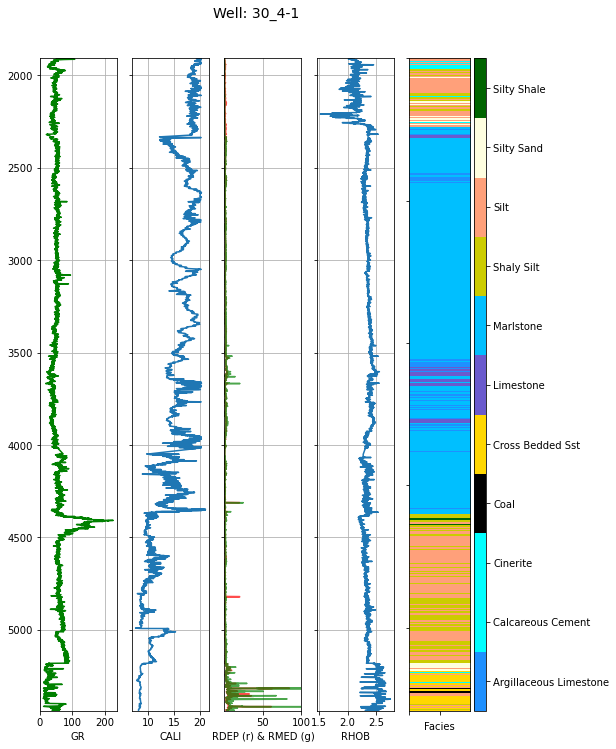

In [8]:
# Plot a well
from deep_ml_curriculum.visualization.well_log import plot_facies, plot_well
well_name="30_4-1"
logs = df.xs(well_name).copy()
logs['DEPT'] = logs.index.get_level_values(0)
facies = logs['LITHOLOGY_GEOLINK'].astype('category').values
plot_well(well_name, 
          logs, 
          facies)
plt.show()

Apply transformation to training and test set.

In [9]:
x_train = scaler.fit_transform(df_train[feat_cols].values)
y_train = encoder.transform(df_train["LITHOLOGY_GEOLINK"])
x_test = scaler.transform(df_test[feat_cols].values)
y_test = encoder.transform(df_test["LITHOLOGY_GEOLINK"])

The output of a classification model is a value for each type. The type with the highest value is the one the model thinks is most likely to be associated with the input data. Therefore, the output size of the model should be the number of types.<br>
Input size will be the number of features (columns) in the data.

In [10]:
input_size = len(feat_cols)
output_size = len(df["LITHOLOGY_GEOLINK"].unique())

Before we start with neural networks, let's see how would a random forest classifier would perform on this data.

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
rf = RandomForestClassifier(
    200, max_depth=5, max_features="sqrt", n_jobs=-1, random_state=14
)

In [13]:
%%time
rf.fit(x_train,y_train)

CPU times: user 6min 42s, sys: 2.74 s, total: 6min 44s
Wall time: 56.8 s


RandomForestClassifier(max_depth=5, max_features='sqrt', n_estimators=200,
                       n_jobs=-1, random_state=14)

In [14]:
preds = rf.predict(x_train)
metrics.accuracy_score(y_train, preds)

0.45340365309365566

In [15]:
preds = rf.predict(x_test)
metrics.accuracy_score(y_test, preds)

0.45276245688903205

So a random forest is giving us an accuracy of about 35%. Let's see if a neural network can beat that. 

<div class="alert alert-success">
  <h3>Exercise</h3>

  Try different parameters to get a better test accuracy

```python
# What are the parameters again?
help(RandomForestClassifier)
    
# Init
rf = RandomForestClassifier(
    200, max_depth=5, max_features="sqrt", n_jobs=-1, random_state=14
)
# Train
rf.fit(x_train,y_train)
preds = rf.predict(x_train)
print('train acc', metrics.accuracy_score(y_train, preds))
    
# Test
preds = rf.predict(x_test)
print('test acc', metrics.accuracy_score(y_test, preds))
```

  <details>
  <summary><b>→ Hints</b></summary>

  * Copy the last 3 cells, then try a depth of 8

  </details>

  <br/>
  <br/>
  <details>
  <summary>
    <b>→ Solution</b>
  </summary>

```python
rf = RandomForestClassifier(
    300, max_depth=6, max_features="sqrt", n_jobs=-1, random_state=14
)
rf.fit(x_train,y_train)
preds = rf.predict(x_train)
print('train acc', metrics.accuracy_score(y_train, preds))
preds = rf.predict(x_test)
print('test acc', metrics.accuracy_score(y_test, preds))
# train acc 0.5516290973521016
# test acc 0.37365357193460574
```

  </details>

  </div>

## Linear Layer
A linear layer (sometimes called a fully-connected layer) is a simple matrix multiplication. Let's say we have an input data with $n$ features and we are trying to predict $m$ outputs. In this case the input of size $n$ is multiplied by a $n\times m$ matrix (called weight) and is summed with a $m\times 1$ matrix (called bias). The result of this operation would be an output of size $m$.
$$ \left( \begin{array}{cc}
x_1 & x_2 & ... & x_n \\
\end{array} \right)
%
\left( \begin{array}{cc}
w_{1,1} & w_{1,2} & ... & w_{1,m} \\
w_{2,1} & w_{2,2} & ... & w_{2,m} \\
 & \vdots\\
w_{n,1} & w_{n,2} & ... & w_{n,m}
\end{array} \right)
+
\left( \begin{array}{cc}
b_1 \\
b_2 \\
\vdots\\
b_m
\end{array} \right)
=
\left( \begin{array}{cc}
y_1 \\
y_2 \\
\vdots\\
y_m
\end{array} \right)
$$

Every time we perform this operation, it is called a linear layer. However, a simple linear layer is not enough to model complex relationship. Therefore, the output of the layers are passed through a non-linear function called _activation function_. <br>
There are many activation functions, but one of the most common ones is Rectified Linear Unit (ReLU). ReLU simply keeps the input value if it is positive and replaces it with zero if it is negative. Mathematically you can also write it as:<br>
$$ReLU(x) = max(0,x)$$


For the start, we create a network that has two linear layers separated by a ReLU activation function. It will takes $n$ inputs and turns it into $h$ values. After passing it through the activation function we turn it into $m$ values as output. You can see the details of the model below:

In [16]:
class SimpleLinear(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(SimpleLinear, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.activation(x)
        x = self.output_layer(x)
        return x

Make sure we are using GPU if we have access to one.

In [17]:
# CUDA means we are using a nvidia GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [18]:
x_train = torch.Tensor(x_train).to(device)
y_train = torch.LongTensor(y_train).to(device)
x_test = torch.Tensor(x_test).to(device)
y_test = torch.LongTensor(y_test).to(device)

In [19]:
len(x_train)

894201

We create an instance of the model. We are using 7 features, and trying to predict a value for each class in the data. Let's choose a hidden size of 100.

In [20]:
model = SimpleLinear(7, output_size, 100)

Use `ADAM` optimiser and Cross Entropy as loss function.

In [21]:
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-3)
loss_func = nn.CrossEntropyLoss()

Define a training loop and train the model.

In [22]:
def train_model(model, epochs=10, bs=256):
    for epoch in tqdm(range(epochs), unit='epoch'):
        training_loss = []
        for i in tqdm(range(0, len(x_train), bs), leave=False):
            model.train()
            optimizer.zero_grad()
            preds = model(x_train[i : i + bs, :])
            loss = loss_func(preds, y_train[i : i + bs])
            loss.backward()
            optimizer.step()
            training_loss.append(loss.item())
            if i % 1000 == 0:
                print('Loss: {:.3f}'.format(loss.item()), end="\r", flush=True)
        preds = model(x_test)
        loss = loss_func(preds, y_test)
        print('Epoch#{} Test Loss = {:.3f}'.format(epoch + 1, loss.item()))

In [23]:
model.to(device)
train_model(model)

Epoch#1 Test Loss = 1.495


Epoch#2 Test Loss = 1.459


Epoch#3 Test Loss = 1.439


Epoch#4 Test Loss = 1.428


Epoch#5 Test Loss = 1.421


Epoch#6 Test Loss = 1.416


Epoch#7 Test Loss = 1.412


Epoch#8 Test Loss = 1.409


Epoch#9 Test Loss = 1.407


Epoch#10 Test Loss = 1.405



Understanding how good a model is based on loss value can be difficult. Let's check the accuracy of the model on training and test set so we can compare it to the random forest classifier we created earlier.

In [24]:
def accuracy(model, x, y):
    m = model.to("cpu")
    m.eval()
    preds = m(x.to("cpu")).argmax(-1)
    preds = preds.detach().numpy()
    return metrics.accuracy_score(y.to("cpu").numpy(), preds)

In [25]:
accuracy(model, x_train, y_train)

0.4936552296407631

In [26]:
accuracy(model, x_test, y_test)

0.49361219587476685

The accuracy is lower than the random forest. Note that our judgement will be based on accuracy on the test set. This shows how good the model is on the data it hasn't seen before. 

<div class="alert alert-success">
  <h3>Exercise</h3>

  Can you modify it so it has two layers? Copy and fix the below code

```python
class MultiLinear(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(SimpleLinear, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layer = # ADD ANOTHER LAYER HERE
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.?? # USE THE LAYER HERE
        x = self.activation(x)
        x = self.output_layer(x)
        return x
    
# Lets test it (this should run without errors) 
model = MultiLinear(7, output_size, 100)   
preds = model(x_train[i : i + bs, :])
```
      

  <details>
  <summary><b>→ Hints</b></summary>

  * the new layer takes in x with `hidden_size` features, and return x with `hidden_size` features. So `nn.Linear(hidden_size, hidden_size)`
  * `x = self.hidden_layer(x)`

  </details>

  <br/>
  <br/>
  <details>
  <summary>
    <b>→ Solution</b>
  </summary>

```python
class MultiLinear(nn.Module):
    def __init__(self, input_size, output_size, hidden_size):
        super(MultiLinear, self).__init__()
        self.input_layer = nn.Linear(input_size, hidden_size)
        self.hidden_layer = nn.Linear(hidden_size, hidden_size) # ADD ANOTHER LAYER HERE hidden_size->hidden_size
        self.activation = nn.ReLU()
        self.output_layer = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.input_layer(x)
        x = self.hidden_layer(x) # USE THE LAYER HERE
        x = self.activation(x)
        x = self.output_layer(x)
        return x

# Lets test it (this should run without errors)
i=10
bs=4
model = MultiLinear(7, output_size, 100)   
preds = model(x_train[i : i + bs, :])
  ```

  </details>

  </div>

# Encoding

In this example now we face an interesting problem. We have categorical values as input. Note that neural networks are a series of mathematical operations; therefore cannot deal with non-numerical variables.

But actually we converted the classes into values using a label encoder, so we should be alright? The problem with using the encoder output is that they are indices not values. They don't have mathematical significance. When index of one type is 4 and the other is 2, it doesn't mean some characteristics of the first type has twice the value of the second. We need a better way of dealing with categorical values. 

One common method is One Hot Encoding. One hot encoding adds a column to features for each type. The value of one of the columns will be one depending on the type.


Let's understand this through an example. Let's say the data has feature that only has three types __A__, __B__, and __C__. By one hot encoding we replace the column with three columns. Each column will contain either one or zero. 
- The first column would be one if the type is __A__ otherwise zero.
- The second column would be one if the type is __B__ otherwise zero.
- The third column would be one if the type is __C__ otherwise zero.

Therefore, if the type was A, the value for the one hot encoded columns would be 1, 0, and , 0.


This method has some drawbacks. One issue is that you treat all the categories as unrelated, but what if they are related?

## Feature Embedding

The flexibility of neural networks allows us to use a technique much better that one hot encoding. This method is called feature embedding. In this method we create a table which assigns a number of features to each class. Then, when the data is passed through the network, instead of the categorical variables their features from the embedding table will be used. What is intersting about this method is that we do not know the values in the table when we start the training process. They will be learned during the training. 

In [27]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
well_encoder = LabelEncoder()
well_encoder.fit(df['Wells'])

LabelEncoder()

In [28]:
# We will just give it depth, so it has to really rely on the embedding, and learn a prior for each well
feat_cols = ["Depths"] # "CALI", "GR", "RHOB", "DTC", "RDEP", "RMED", "Depths"]

Since we have one categorical variable, and the rest are numerical, we can separate the inputs into a categorical inputs and numerical inputs.

In [29]:
xnum_train = scaler.fit_transform(df_train[feat_cols].values)
xcat_train = well_encoder.transform(df_train['Wells'])
y_train = encoder.transform(df_train["LITHOLOGY_GEOLINK"])

xnum_test = scaler.transform(df_test[feat_cols].values)
xcat_test = well_encoder.transform(df_test['Wells'])
y_test = encoder.transform(df_test["LITHOLOGY_GEOLINK"])

In [30]:
xnum_train = torch.Tensor(xnum_train).to(device)
xcat_train = torch.LongTensor(xcat_train).to(device)
y_train = torch.LongTensor(y_train).to(device)

xnum_test = torch.Tensor(xnum_test).to(device)
xcat_test = torch.LongTensor(xcat_test).to(device)
y_test = torch.LongTensor(y_test).to(device)

The we need to create a new model with embedding tables for categorical variables. We need to specify how many types there are in our categorical columns (num_classes), and how many values will be used to represent each type (emb_vec_size). Then, in the model we create a stacked linear layers with dropout (as defined before) using the right number of inputs (numerical inputs + embedding features).

In [31]:
help(nn.Embedding)

Help on class Embedding in module torch.nn.modules.sparse:

class Embedding(torch.nn.modules.module.Module)
 |  Embedding(num_embeddings: int, embedding_dim: int, padding_idx: Union[int, NoneType] = None, max_norm: Union[float, NoneType] = None, norm_type: float = 2.0, scale_grad_by_freq: bool = False, sparse: bool = False, _weight: Union[torch.Tensor, NoneType] = None) -> None
 |  
 |  A simple lookup table that stores embeddings of a fixed dictionary and size.
 |  
 |  This module is often used to store word embeddings and retrieve them using indices.
 |  The input to the module is a list of indices, and the output is the corresponding
 |  word embeddings.
 |  
 |  Args:
 |      num_embeddings (int): size of the dictionary of embeddings
 |      embedding_dim (int): the size of each embedding vector
 |      padding_idx (int, optional): If given, pads the output with the embedding vector at :attr:`padding_idx`
 |                                       (initialized to zeros) whenever it 

In [32]:
class FeatureEmbed(nn.Module):
    def __init__(self, hidden_size, num_classes, emb_vec_size, output_size):
        super(FeatureEmbed, self).__init__()
        self.emb = nn.Embedding(num_classes, emb_vec_size)
        self.net = SimpleLinear(
            input_size=len(feat_cols) + emb_vec_size,
            output_size=output_size,
            hidden_size=hidden_size
        )

    def forward(self, xnum, xcat):
        x1 = self.emb(xcat)
        x_in = torch.cat((x1, xnum), dim=1)
        return self.net(x_in)

Now, we can create an instance of the model.

In [33]:
num_classes=len(well_encoder.classes_)
model = FeatureEmbed(
    hidden_size=6,
    num_classes=num_classes,
    emb_vec_size=2,
    output_size=len(encoder.classes_)
).to(device)

Use Mean Square Error as loss function.

In [34]:
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)

And define a training loop. The training loop is slightly different, since we have a numerical input and a categorical input.

In [35]:
def train_emb_model(model, epochs=10, bs=256):
    for epoch in tqdm(range(epochs), unit='epoch'):
        training_loss = []
        for i in tqdm(range(0, len(x_train), bs), leave=False, desc='train'):
            model.train()
            optimizer.zero_grad()
            preds = model(xnum_train[i : i + bs, :], xcat_train[i : i + bs])
            loss = loss_func(preds, y_train[i : i + bs])
            loss.backward()
            optimizer.step()
            training_loss.append(loss.item())
            if i % 1000 == 0:
                print('Loss: {:.3f}'.format(np.mean(training_loss)), end="\r", flush=True)
                
        test_loss = []
        for i in tqdm(range(0, len(xnum_test), bs), leave=False, desc='test'):
            model.eval()
            preds = model(xnum_test[i : i + bs, :], xcat_test[i : i + bs])
            loss = loss_func(preds, y_test[i : i + bs])
            if torch.isfinite(loss):
                test_loss.append(loss.item())
        test_loss = np.mean(test_loss)
        print('Epoch#{}, Test Loss = {:.3f}, Train Loss = {:.3f}'.format(epoch + 1, np.mean(training_loss), test_loss))

In [36]:
train_emb_model(model, epochs=10, bs=256)

Epoch#1, Test Loss = 2.137, Train Loss = 1.948


Epoch#2, Test Loss = 1.900, Train Loss = 1.858


Epoch#3, Test Loss = 1.813, Train Loss = 1.781


Epoch#4, Test Loss = 1.762, Train Loss = 1.749


Epoch#5, Test Loss = 1.739, Train Loss = 1.734


Epoch#6, Test Loss = 1.729, Train Loss = 1.728


Epoch#7, Test Loss = 1.724, Train Loss = 1.724


Epoch#8, Test Loss = 1.721, Train Loss = 1.722


Epoch#9, Test Loss = 1.719, Train Loss = 1.720


Epoch#10, Test Loss = 1.718, Train Loss = 1.719



We can use accuracy as metric.

In [37]:
def accuracy2(model, xnum, xcat, y):
    m = model.to("cpu")
    m.eval()
    preds = m(xnum.to("cpu"), xcat.to("cpu")).argmax(-1)
    preds = preds.detach().numpy()
    return metrics.accuracy_score(y.to("cpu").numpy(), preds)

In [38]:
accuracy2(model, xnum_train, xcat_train, y_train)

0.3858271238793068

In [39]:
accuracy2(model, xnum_test, xcat_test, y_test)

0.38587168028771957

The model is trained, which means we should be able to have a look at embedding table and see the values in there.

In [40]:
embed = model.emb.weight.detach().numpy()

Text(0, 0.5, 'embedding dimension B')

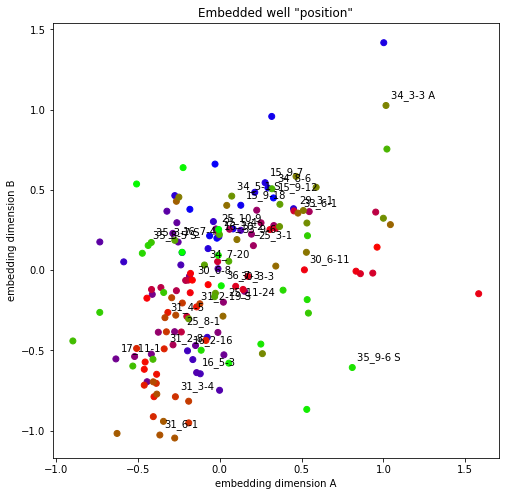

In [92]:
x = embed[:, 0]
y = embed[:, 1]
well_names = well_encoder.inverse_transform(range(len(x)))

plt.figure(figsize=(8, 8))
plt.scatter(x, y, c=range(len(x)), cmap='brg')

# Labels for every Nth
for i in range(0, num_classes, 5):
    plt.text(x[i]+0.03, y[i]+0.03, well_names[i], color='k', ha='left', va='bottom')
    
plt.title('Embedded well "position"')
plt.xlabel('embedding dimension A')
plt.ylabel('embedding dimension B')

Text(0, 0.5, 'y')

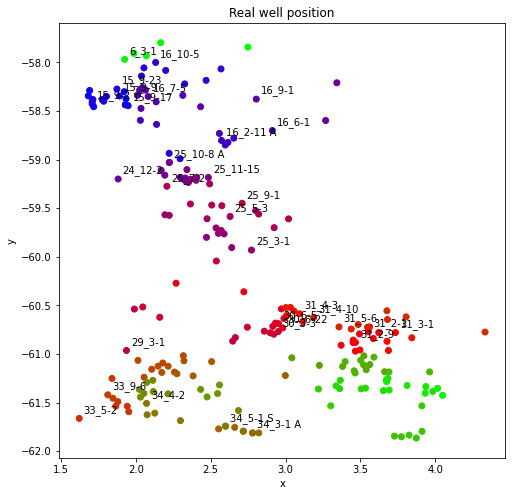

In [95]:
import geopandas as gpd
from pathlib import Path
interim_locations = Path("../../data/processed/geolink_norge_dataset/")
df_well_tops = gpd.read_file(interim_locations / "norge_well_tops.gpkg")[['wlbWellboreName_geolink', 'geometry']].sort_values('wlbWellboreName_geolink')

x = df_well_tops['x'] = df_well_tops.geometry.x
y = df_well_tops['y'] = -df_well_tops.geometry.y
well_names = df_well_tops.wlbWellboreName_geolink

plt.figure(figsize=(8, 8))
plt.scatter(x, y, c=range(len(x)), cmap='brg')

# Labels for every Nth
for i in range(0, num_classes, 5):
    plt.text(x[i]+0.03, y[i]+0.03, well_names[i], color='k', ha='left', va='bottom')

plt.title('Real well position')
plt.xlabel('x')
plt.ylabel('y')

The plot above shows the two values we used for each type. If the model is trained well, we should be able to see types with closer characteristics should be placed closer to each other in the plot above. 

In this case clusters of wells should have similar names. Below is a map of wells, showing how similar names are clustered in real life. 


This is another interesting feature of embedding tables. It allows us to not only to convert categorical variables to numericals, but also we can see the behaviour of each class and compare them together.

Of course we could just use the x and y position as embeddings, but this example helped illustrate learned embeddings.



<div class="alert alert-success">
  <h3>Exercise</h3>

  Try increasing the number of embedding features to $5$ and see how it would affect $R^2$ value.
    

  <br/>
  <br/>
  <details>
  <summary>
    <b>→ Solution</b>
  </summary>

```Python
vec_size = 5
dropout = 0.3
model = FeatureEmbed(
    hidden_sizes=64,
    num_classes=num_classes,
    emb_vec_size=vec_size
).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)
train_emb_model(model, epochs=10, bs=256)
Rsquare(model, xnum_test, xcat_test, y_test)
```


  </details>

  </div>


In [42]:
# Code Here

# Further Reading
- [Why One-Hot Encode Data in Machine Learning?](https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/)
- [Neural Network Embeddings Explained](https://towardsdatascience.com/neural-network-embeddings-explained-4d028e6f0526)